Select a single, complex dataset and execute a full end-to-end data analysis workflow.
This must include: data loading, preprocessing (handling missing values, feature
scaling/normalization) , selecting and training a supervised learning model, and
finally, evaluating and reporting the model's performance.

1. Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = sns.load_dataset('titanic')

# --- 1. Define Features (X) and Target (y) ---
# We select relevant features for prediction
# 'pclass' (Ticket class) is numeric but acts like a category
feature_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target_col = 'survived'

X = df[feature_cols]
y = df[target_col]

# --- 2. Explore the Data ---
print("--- Data Info (Checking for missing values and types) ---")
X.info()

# --- 3. Split the Data ---
# We split BEFORE preprocessing to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

--- Data Info (Checking for missing values and types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB

Training set shape: (712, 7)
Testing set shape: (179, 7)


2. Preprocessing Pipeline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- 1. Define feature lists ---
numeric_features = ['age', 'fare', 'sibsp', 'parch']
categorical_features = ['embarked', 'sex', 'pclass']

# --- 2. Create the preprocessing pipelines ---

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing 'age'
    ('scaler', StandardScaler())                   # Scale all numeric data
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing 'embarked'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))   # Convert categories to 0s/1s
])

# --- 3. Combine pipelines with ColumnTransformer ---
# This preprocessor applies the right transformer to the right columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

3. Model Selection and Training

In [3]:
from sklearn.ensemble import RandomForestClassifier

# --- 1. Create the full pipeline ---
# It chains the preprocessor and the classifier
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# --- 2. Train the model ---
# We fit the entire pipeline on the raw (unprocessed) training data
print("\n--- Training the full model pipeline... ---")
full_pipeline.fit(X_train, y_train)
print("--- Training complete! ---")


--- Training the full model pipeline... ---
--- Training complete! ---


4. Evaluation and Reporting


Model Accuracy: 0.8212 (or 82.12%)

--- Confusion Matrix ---


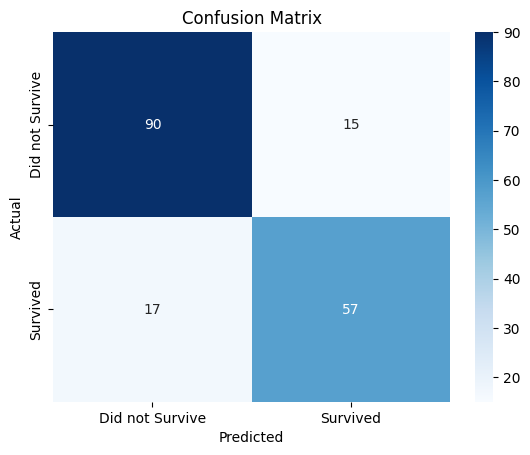


--- Classification Report ---
                     precision    recall  f1-score   support

Did not Survive (0)       0.84      0.86      0.85       105
       Survived (1)       0.79      0.77      0.78        74

           accuracy                           0.82       179
          macro avg       0.82      0.81      0.81       179
       weighted avg       0.82      0.82      0.82       179



In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Make predictions ---
y_pred = full_pipeline.predict(X_test)

# --- 2. Calculate Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f} (or {accuracy*100:.2f}%)")

# --- 3. Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did not Survive', 'Survived'],
            yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --- 4. Classification Report ---
print("\n--- Classification Report ---")
# '1' is 'Survived', '0' is 'Did not Survive'
print(classification_report(y_test, y_pred, target_names=['Did not Survive (0)', 'Survived (1)']))